In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rap_project/sanfara_songs.csv')


In [4]:
df['Song Date'] = pd.to_datetime(df['Song Date'])
df.set_index('Song Date', inplace=True)

In [5]:
df

,Video Title,Song Name,Song Type,Featuring Artists,Number of Likes,Number of Views,Number of Comments
Song Date,,,,,,,
2024-07-06 13:59:22+00:00,Sanfara | Wallah Twahachtek | والله توحشتك | ...,Sanfara | Wallah Twahachtek | والله توحشتك | ...,Solo,[],4980,125746,254
2024-07-02 14:07:25+00:00,Sanfara | Melody | HS S1,Sanfara | Melody | HS S1,Solo,[],7390,173288,549
2024-06-22 12:58:25+00:00,Sanfara Ft @Abdeelgha4 - Ma Vie [Official Musi...,Sanfara Ft @Abdeelgha4 - Ma Vie [Official Musi...,Solo,[],29617,1170707,1195
2024-06-13 11:59:00+00:00,Sanfara - Psy (Official Music Video),Sanfara - Psy (Official Music Video),Solo,[],18782,1015725,878
2024-06-06 11:00:00+00:00,Sanfara - Taw Nbi3 (Official Music Video) | تو...,Sanfara - Taw Nbi3 (Official Music Video) | تو...,Solo,[],14810,573840,760
...,...,...,...,...,...,...,...
2016-11-04 13:07:26+00:00,Sanfara - Mosrata | مصراتة,Sanfara - Mosrata | مصراتة,Solo,[],9971,943923,451
2016-11-04 13:07:35+00:00,Sanfara - Massayef | مصايف,Sanfara - Massayef | مصايف,Solo,[],10250,1307064,221
2016-11-04 13:07:45+00:00,Sanfara - Festival of Color,Sanfara - Festival of Color,Solo,[],4201,634983,75


In [6]:
# Check for duplicates
duplicates = df[df.duplicated()]
print("Duplicates:")
print(duplicates)



# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Duplicates:
                                                                 Video Title  \
Song Date                                                                      
2024-06-22 12:58:25+00:00  Sanfara Ft @Abdeelgha4 - Ma Vie [Official Musi...   
2024-06-13 11:59:00+00:00               Sanfara - Psy (Official Music Video)   
2024-05-10 13:00:21+00:00             Sanfara - Lambo (Official Music Video)   
2024-04-26 13:01:40+00:00   Sanfara - Oumouri (Official Music Video) | أموري   
2020-05-09 18:20:55+00:00  Sanfara - Fa9ou Beya (Audio Officiel) | فاقو بيّا   
...                                                                      ...   
2017-11-06 17:01:13+00:00               Sanfara - Ferryville (Clip Officiel)   
2017-07-16 23:19:44+00:00                                    Sanfara - Jorra   
2017-03-28 17:52:05+00:00                 Sanfara - One Love (Clip Officiel)   
2017-02-22 19:21:31+00:00                   Sanfara feat Soltan - Nahki Alik   
2017-01-19 19:00:00+00:00   

In [7]:

# Remove duplicates
df_cleaned = df.drop_duplicates()



In [8]:
df_cleaned.shape

(117, 7)

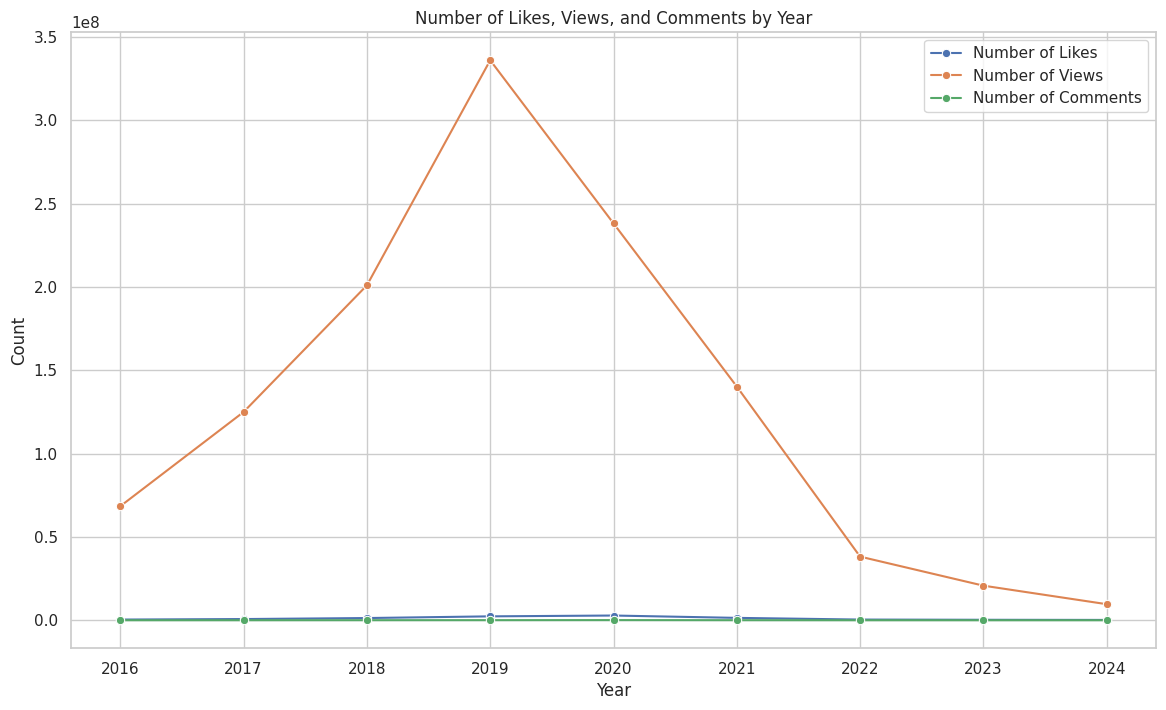

In [9]:


# Reset the index to get 'Song Date' back as a column
df_sorted = df_cleaned.sort_index().reset_index()

# Extract the year from the Song Date
df_sorted['Year'] = df_sorted['Song Date'].dt.year

# Group by year and aggregate the sum of likes, views, and comments
grouped_df = df_sorted.groupby('Year').sum(numeric_only=True).reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Plotting the grouped data
plt.figure(figsize=(14, 8))

# Plot Number of Likes
sns.lineplot(data=grouped_df, x='Year', y='Number of Likes', marker='o', label='Number of Likes')

# Plot Number of Views
sns.lineplot(data=grouped_df, x='Year', y='Number of Views', marker='o', label='Number of Views')

# Plot Number of Comments
sns.lineplot(data=grouped_df, x='Year', y='Number of Comments', marker='o', label='Number of Comments')

# Adding titles and labels
plt.title('Number of Likes, Views, and Comments by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

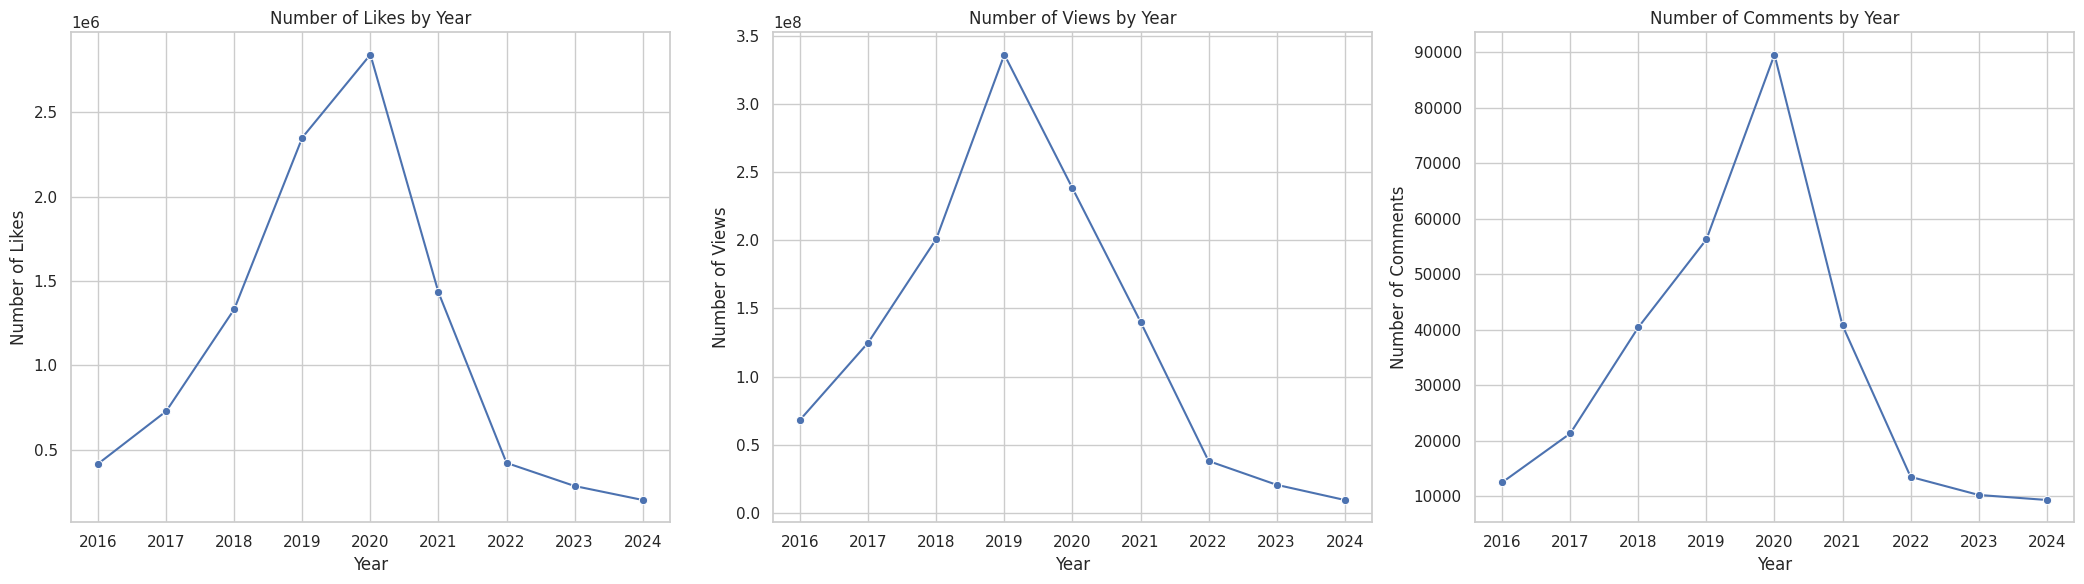

In [10]:
# Reset the index to get 'Song Date' back as a column
df_sorted = df_cleaned.sort_index().reset_index()

# Extract the year from the Song Date
df_sorted['Year'] = df_sorted['Song Date'].dt.year

# Group by year and aggregate the sum of likes, views, and comments
grouped_df = df_sorted.groupby('Year').sum(numeric_only=True).reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Plot Number of Likes
sns.lineplot(data=grouped_df, x='Year', y='Number of Likes', marker='o', ax=axes[0])
axes[0].set_title('Number of Likes by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Likes')

# Plot Number of Views
sns.lineplot(data=grouped_df, x='Year', y='Number of Views', marker='o', ax=axes[1])
axes[1].set_title('Number of Views by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Views')

# Plot Number of Comments
sns.lineplot(data=grouped_df, x='Year', y='Number of Comments', marker='o', ax=axes[2])
axes[2].set_title('Number of Comments by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Comments')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Select the top 5 songs with the most number of views
df_top_5 = df_cleaned.nlargest(5, 'Number of Views')[['Song Name', 'Number of Views']]

# Display the DataFrame
print(df_top_5)

                                                                   Song Name  \
Song Date                                                                      
2019-05-29 12:32:24+00:00  Sanfara ft. Nordo - Nbet Nhareb (Clip Officiel...   
2019-10-08 20:12:39+00:00  Sanfara - El 3ajla Edour (Clip Officiel) | الع...   
2021-10-09 11:40:55+00:00              Sanfara - Wakti Yejri (Clip Officiel)   
2018-12-02 14:02:52+00:00   Sanfara ft. Souki & Saad - No No (Clip Officiel)   
2019-02-21 18:34:41+00:00        Sanfara ft. Souki - Ma Cité (Clip Officiel)   

                           Number of Views  
Song Date                                   
2019-05-29 12:32:24+00:00         87798292  
2019-10-08 20:12:39+00:00         65008067  
2021-10-09 11:40:55+00:00         62166266  
2018-12-02 14:02:52+00:00         59491187  
2019-02-21 18:34:41+00:00         58748335  


<ipython-input-12-46f6bcca191a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned.index.year
<ipython-input-12-46f6bcca191a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned.index.month
<ipython-input-12-46f6bcca191a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Number of Views'

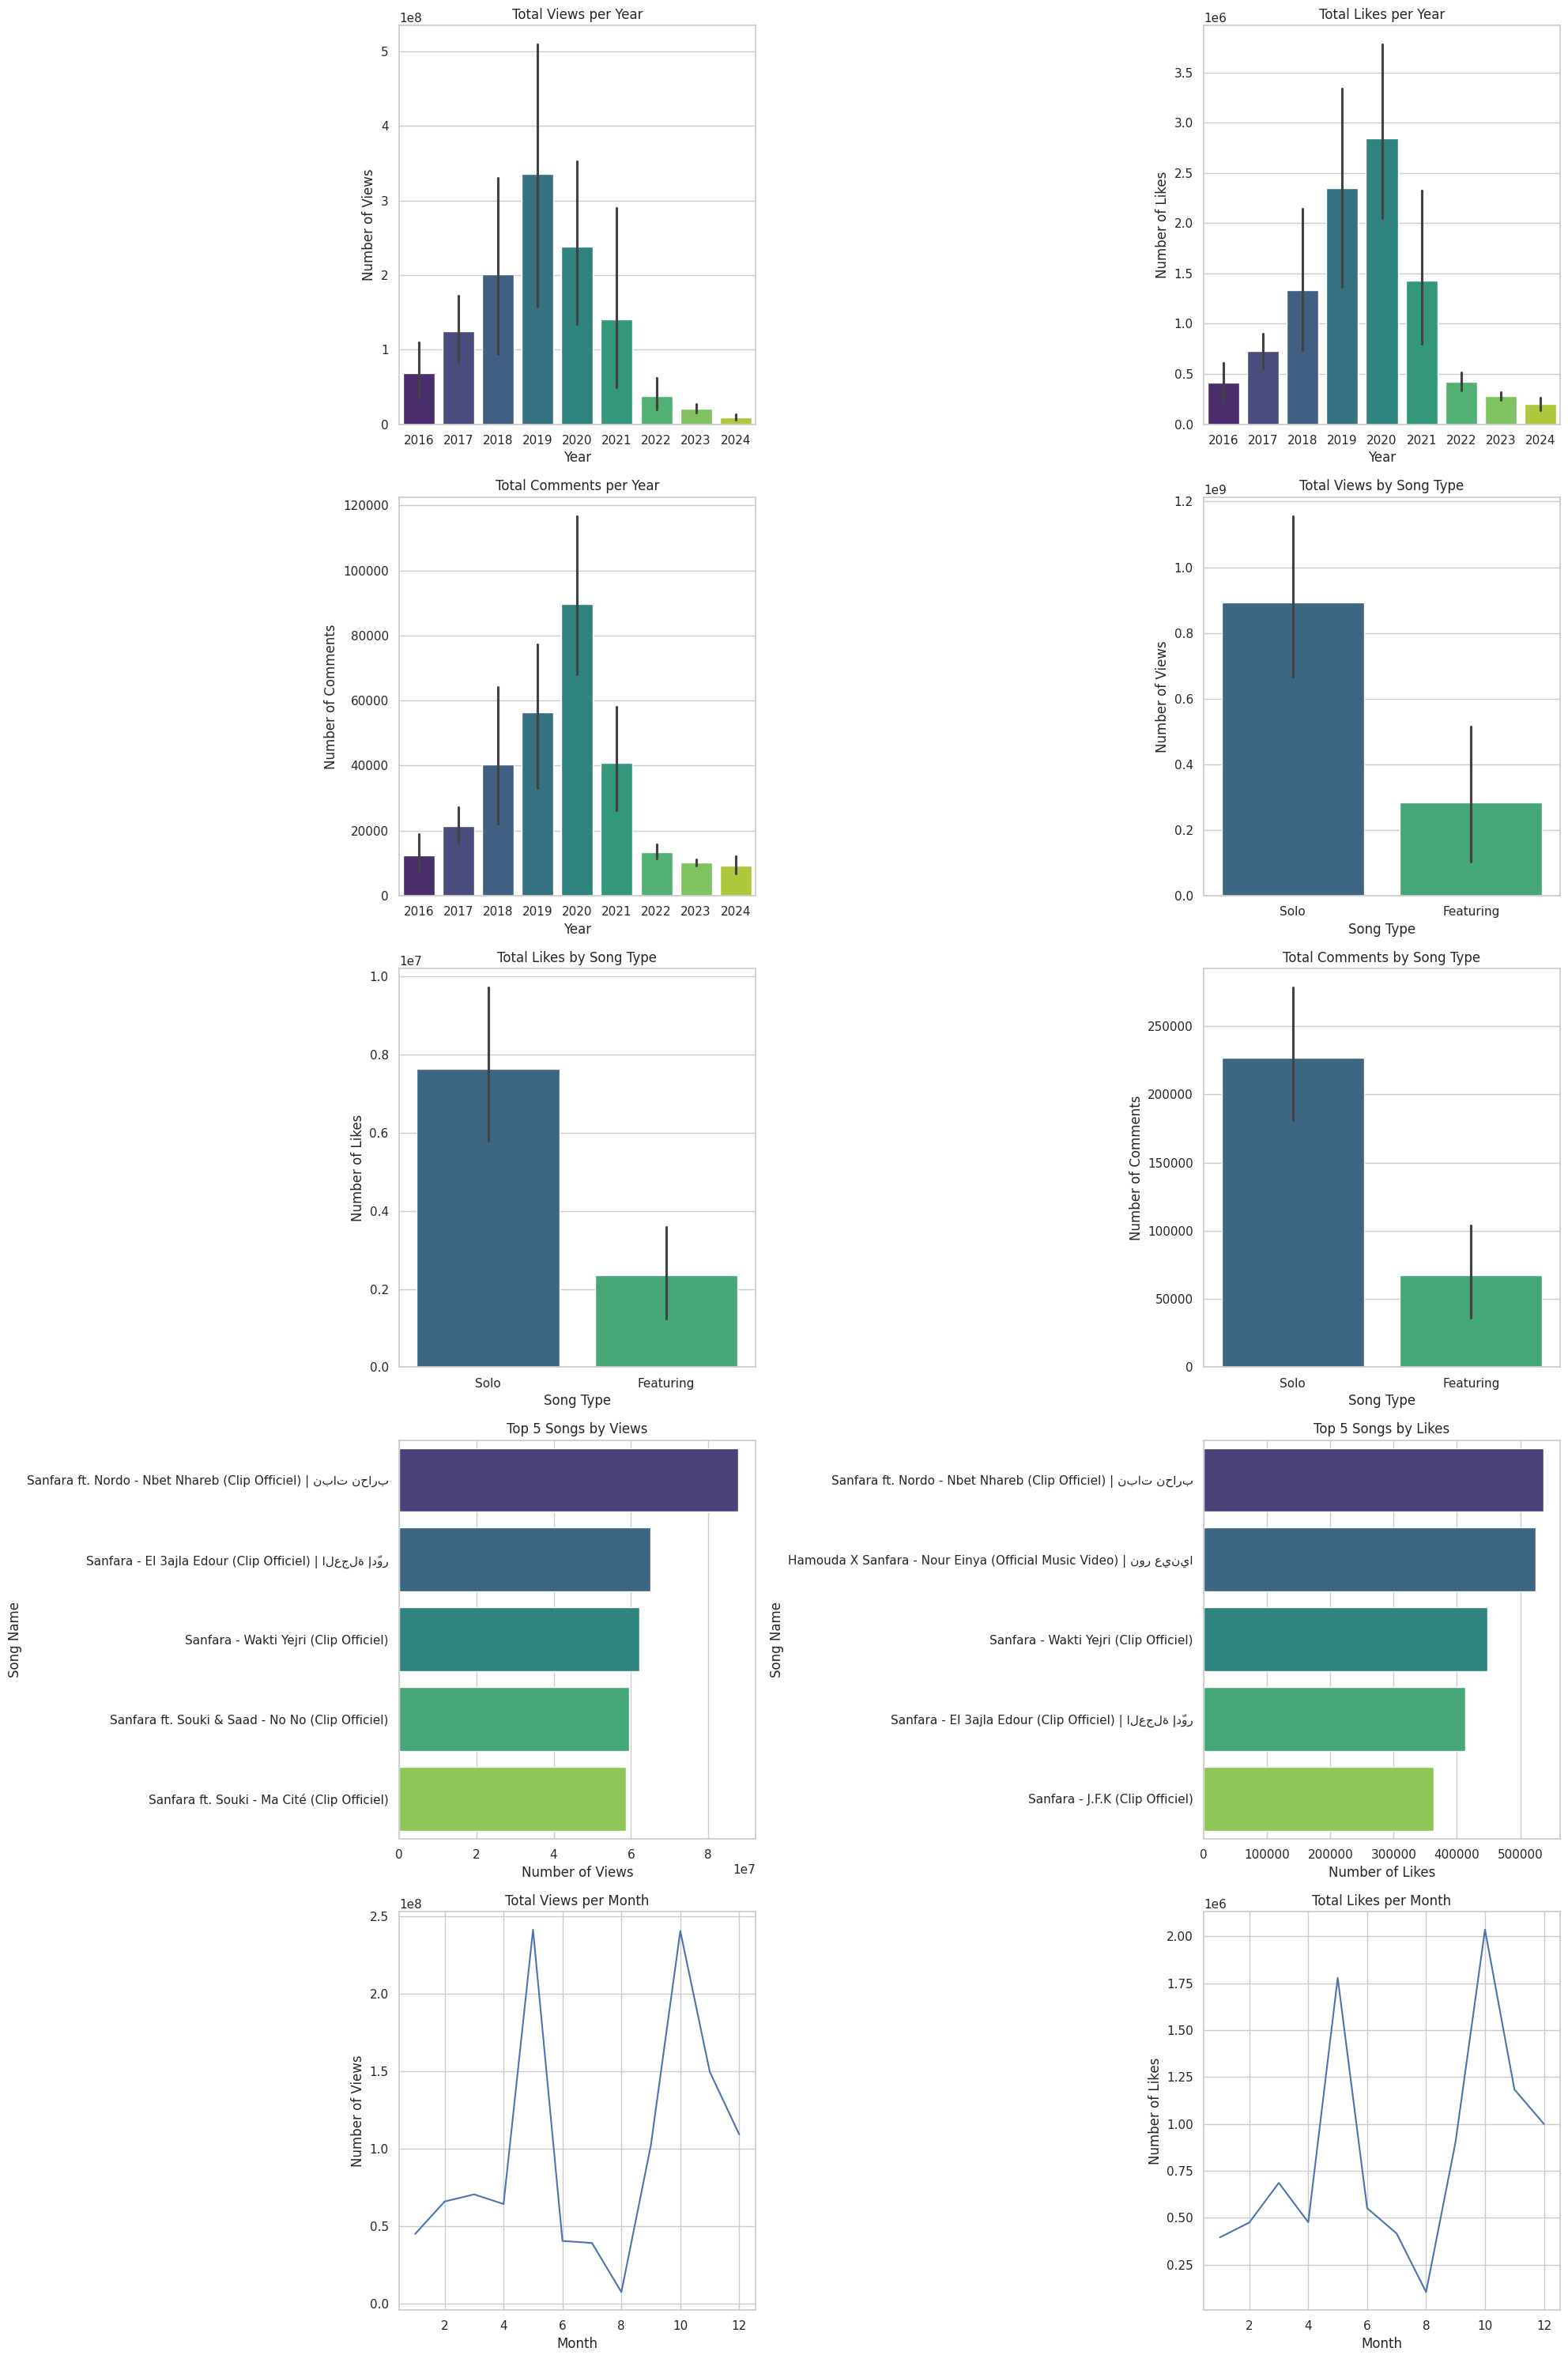

In [12]:

# Ajouter des colonnes pour l'année et le mois
df_cleaned['Year'] = df_cleaned.index.year
df_cleaned['Month'] = df_cleaned.index.month

# Créer des graphiques
plt.figure(figsize=(20, 30))

# 1. Nombre de vues par année
plt.subplot(5, 2, 1)
sns.barplot(x='Year', y='Number of Views', data=df_cleaned, estimator=sum, palette='viridis')
plt.title('Total Views per Year')

# 2. Nombre de likes par année
plt.subplot(5, 2, 2)
sns.barplot(x='Year', y='Number of Likes', data=df_cleaned, estimator=sum, palette='viridis')
plt.title('Total Likes per Year')

# 3. Nombre de commentaires par année
plt.subplot(5, 2, 3)
sns.barplot(x='Year', y='Number of Comments', data=df_cleaned, estimator=sum, palette='viridis')
plt.title('Total Comments per Year')

# 4. Nombre de vues par type de chanson (Solo vs Featuring)
plt.subplot(5, 2, 4)
sns.barplot(x='Song Type', y='Number of Views', data=df_cleaned, estimator=sum, palette='viridis')
plt.title('Total Views by Song Type')

# 5. Nombre de likes par type de chanson (Solo vs Featuring)
plt.subplot(5, 2, 5)
sns.barplot(x='Song Type', y='Number of Likes', data=df_cleaned, estimator=sum, palette='viridis')
plt.title('Total Likes by Song Type')

# 6. Nombre de commentaires par type de chanson (Solo vs Featuring)
plt.subplot(5, 2, 6)
sns.barplot(x='Song Type', y='Number of Comments', data=df_cleaned, estimator=sum, palette='viridis')
plt.title('Total Comments by Song Type')

# 7. Top 5 chansons par nombre de vues
top_5_views = df_cleaned.nlargest(5, 'Number of Views')
plt.subplot(5, 2, 7)
sns.barplot(x='Number of Views', y='Song Name', data=top_5_views, palette='viridis')
plt.title('Top 5 Songs by Views')

# 8. Top 5 chansons par nombre de likes
top_5_likes = df_cleaned.nlargest(5, 'Number of Likes')
plt.subplot(5, 2, 8)
sns.barplot(x='Number of Likes', y='Song Name', data=top_5_likes, palette='viridis')
plt.title('Top 5 Songs by Likes')

# 9. Nombre de vues par mois
plt.subplot(5, 2, 9)
sns.lineplot(x='Month', y='Number of Views', data=df_cleaned, estimator=sum, ci=None)
plt.title('Total Views per Month')

# 10. Nombre de likes par mois
plt.subplot(5, 2, 10)
sns.lineplot(x='Month', y='Number of Likes', data=df_cleaned, estimator=sum, ci=None)
plt.title('Total Likes per Month')

plt.tight_layout()
plt.show()

In [14]:
!pip install prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmicdh5t4/6covh1g1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmicdh5t4/57k8rauw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94780', 'data', 'file=/tmp/tmpmicdh5t4/6covh1g1.json', 'init=/tmp/tmpmicdh5t4/57k8rauw.json', 'output', 'file=/tmp/tmpmicdh5t4/prophet_modelnyv7do4w/prophet_model-20240722075014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


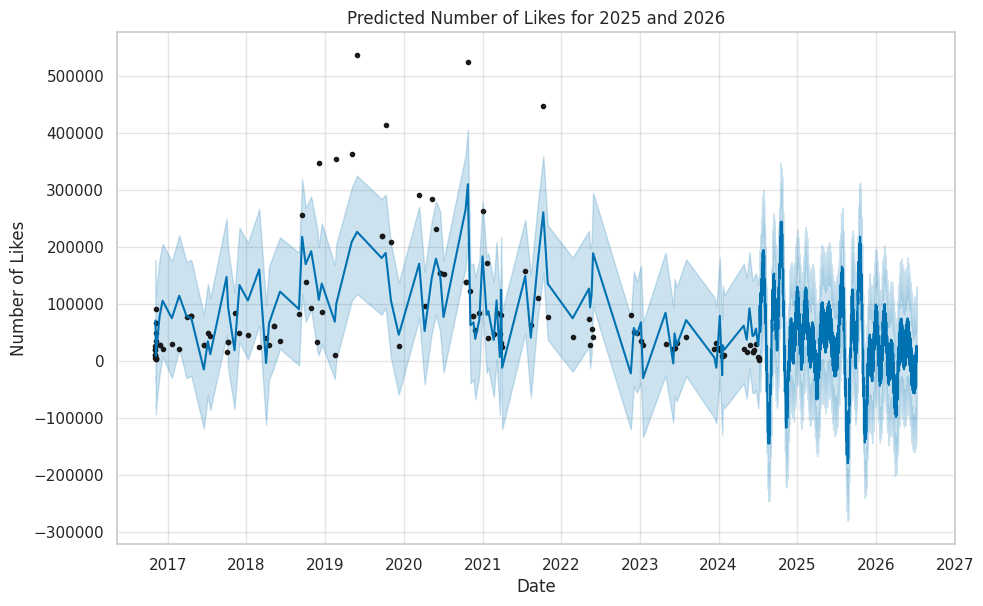

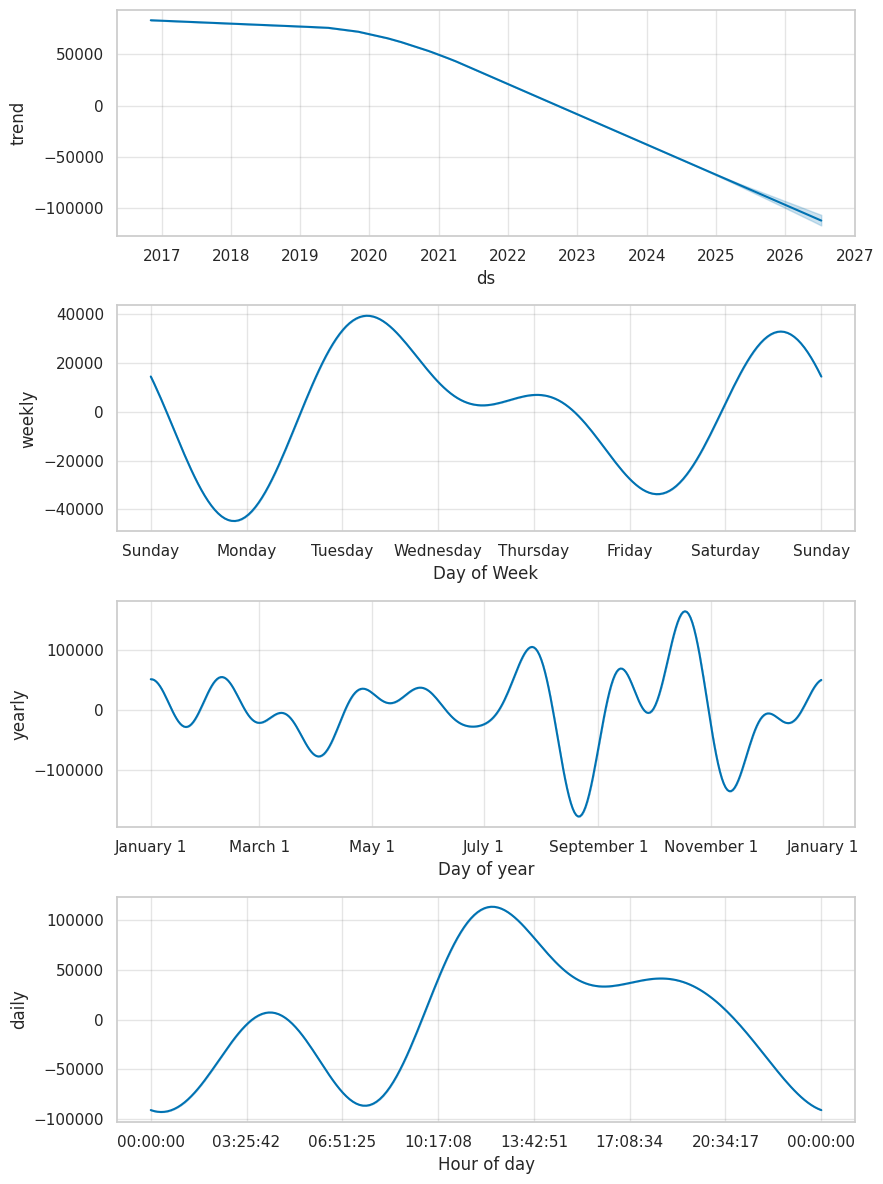

In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Supposons que df_cleaned est votre DataFrame avec Song Date comme index
# Réinitialiser l'index pour avoir Song Date comme colonne
df_cleaned = df_cleaned.reset_index()

# Supprimer les informations de fuseau horaire
df_cleaned['Song Date'] = df_cleaned['Song Date'].dt.tz_localize(None)

# Préparer les données pour Prophet
df_prophet = df_cleaned[['Song Date', 'Number of Likes']].rename(columns={'Song Date': 'ds', 'Number of Likes': 'y'})

# Initialiser le modèle Prophet
model = Prophet()

# Entraîner le modèle
model.fit(df_prophet)

# Faire des prédictions pour les deux prochaines années (2025 et 2026)
future = model.make_future_dataframe(periods=730)  # 730 jours ~ 2 ans
forecast = model.predict(future)

# Afficher les résultats
fig = model.plot(forecast)
plt.title('Predicted Number of Likes for 2025 and 2026')
plt.xlabel('Date')
plt.ylabel('Number of Likes')
plt.show()

# Afficher les composants de la prévision
fig2 = model.plot_components(forecast)
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que df_cleaned est votre DataFrame initial avec Song Date comme index
df_cleaned = df_cleaned.reset_index()

# Supprimer les informations de fuseau horaire
df_cleaned['Song Date'] = df_cleaned['Song Date'].dt.tz_localize(None)

# Extraire les années et les mois
df_cleaned['Year'] = df_cleaned['Song Date'].dt.year
df_cleaned['Month'] = df_cleaned['Song Date'].dt.month
df_cleaned['DayOfWeek'] = df_cleaned['Song Date'].dt.dayofweek


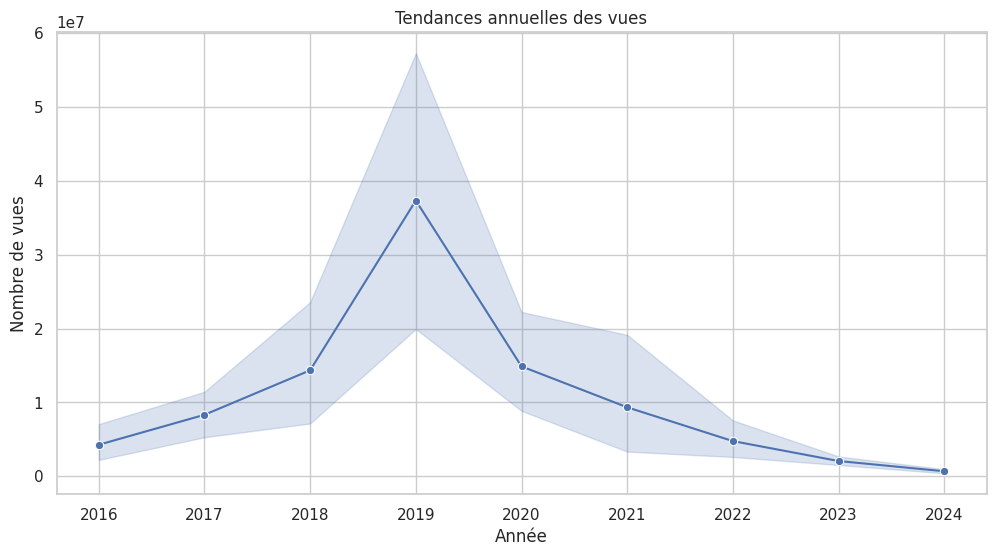

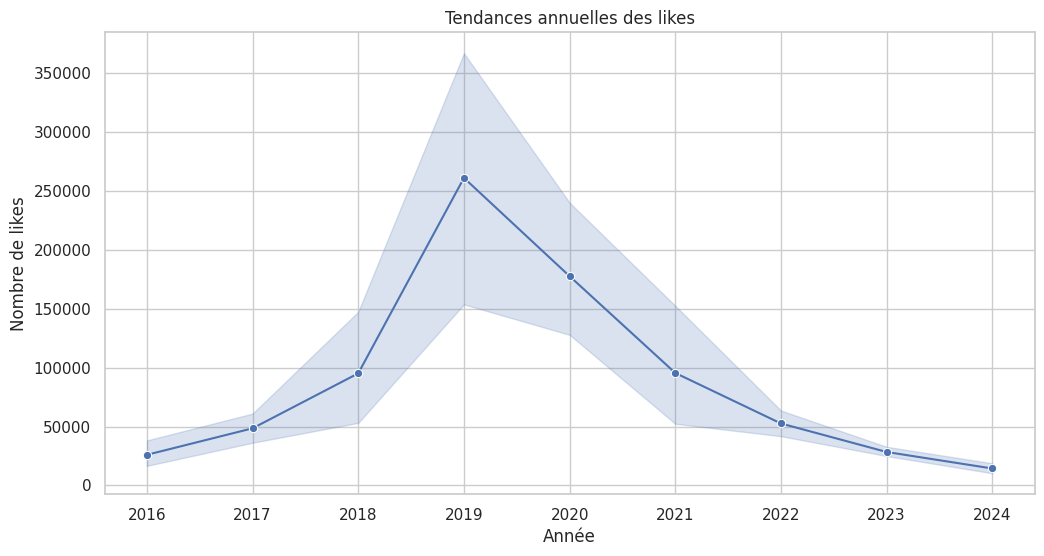

In [19]:
# Vues annuelles
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Year', y='Number of Views', marker='o')
plt.title('Tendances annuelles des vues')
plt.xlabel('Année')
plt.ylabel('Nombre de vues')
plt.show()

# Likes annuels
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Year', y='Number of Likes', marker='o')
plt.title('Tendances annuelles des likes')
plt.xlabel('Année')
plt.ylabel('Nombre de likes')
plt.show()


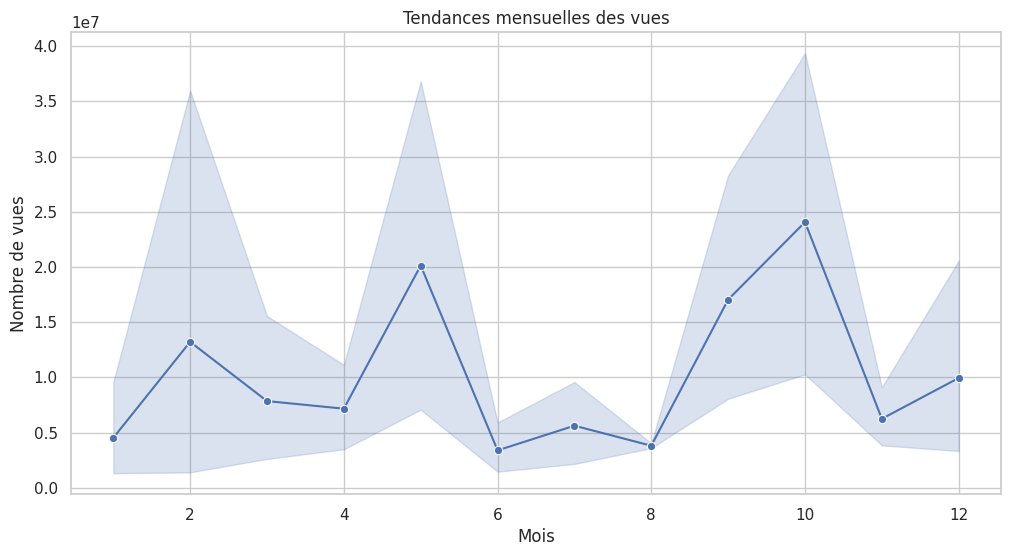

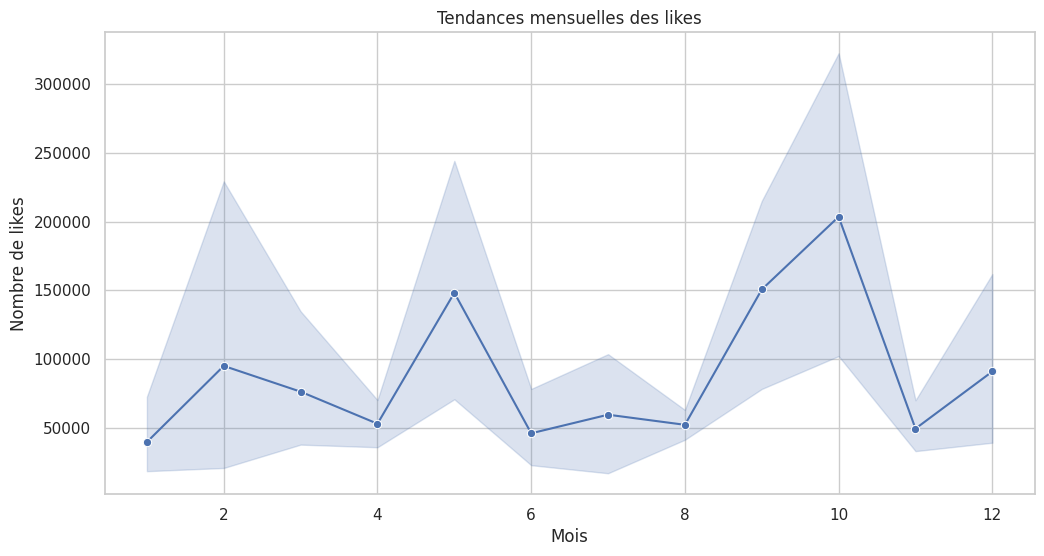

In [21]:
# Vues mensuelles
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Month', y='Number of Views', marker='o')
plt.title('Tendances mensuelles des vues')
plt.xlabel('Mois')
plt.ylabel('Nombre de vues')
plt.show()

# Likes mensuels
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Month', y='Number of Likes', marker='o')
plt.title('Tendances mensuelles des likes')
plt.xlabel('Mois')
plt.ylabel('Nombre de likes')
plt.show()


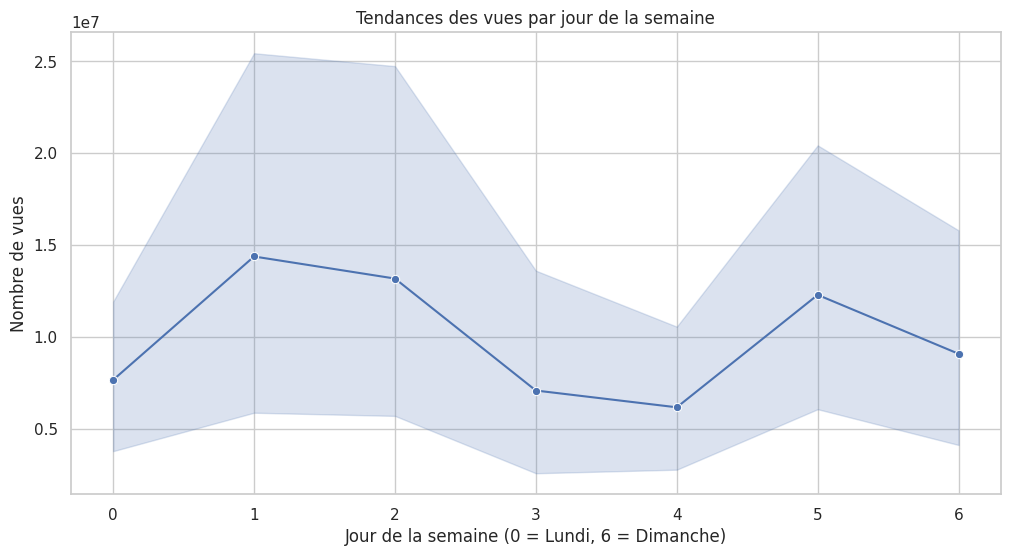

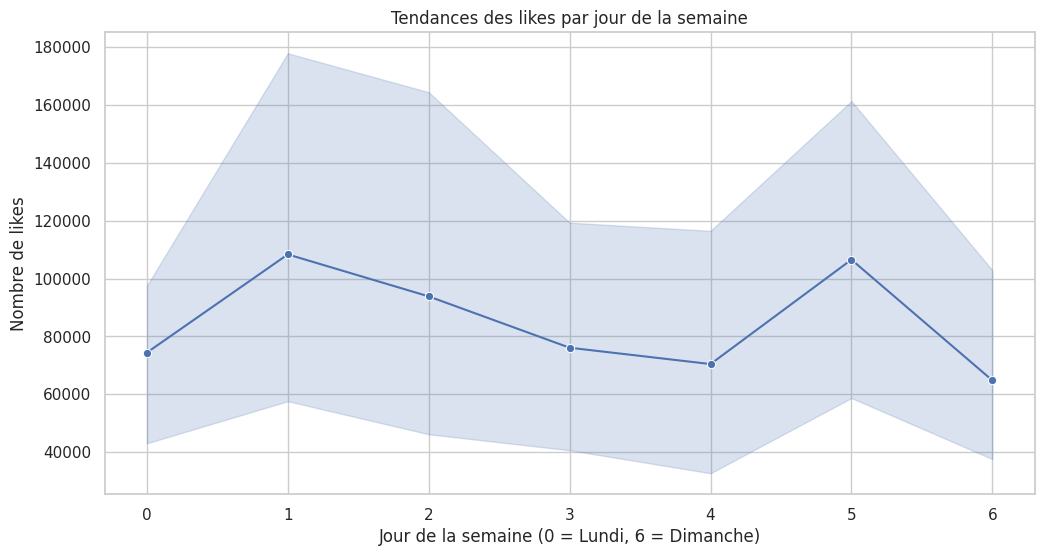

In [22]:
# Vues par jour de la semaine
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='DayOfWeek', y='Number of Views', marker='o')
plt.title('Tendances des vues par jour de la semaine')
plt.xlabel('Jour de la semaine (0 = Lundi, 6 = Dimanche)')
plt.ylabel('Nombre de vues')
plt.show()

# Likes par jour de la semaine
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='DayOfWeek', y='Number of Likes', marker='o')
plt.title('Tendances des likes par jour de la semaine')
plt.xlabel('Jour de la semaine (0 = Lundi, 6 = Dimanche)')
plt.ylabel('Nombre de likes')
plt.show()


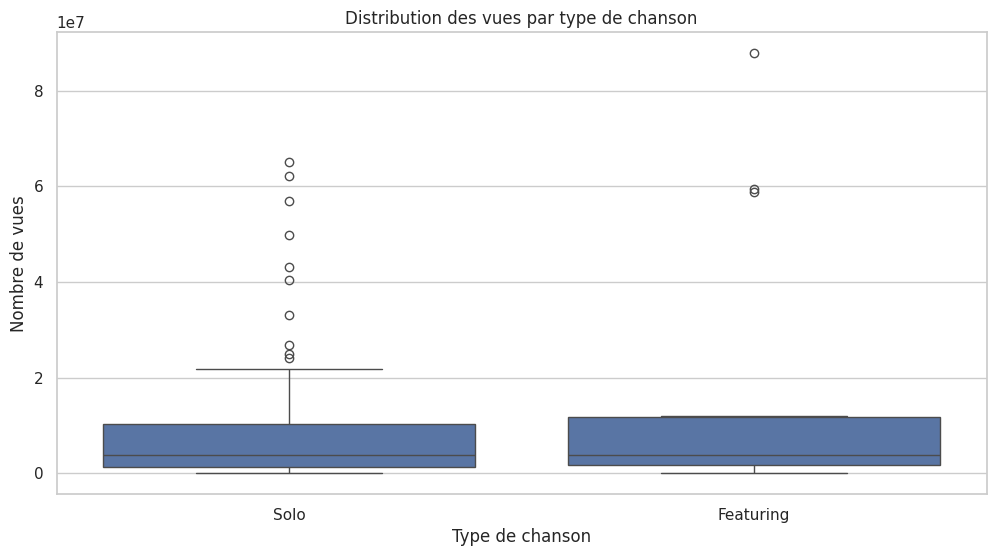

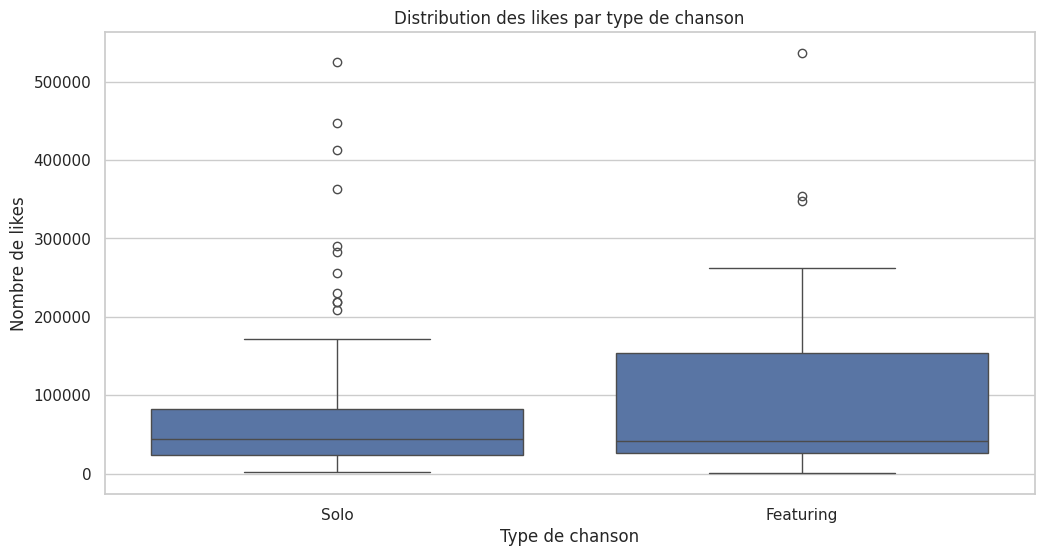

In [23]:
# Vues par type de chanson
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Song Type', y='Number of Views')
plt.title('Distribution des vues par type de chanson')
plt.xlabel('Type de chanson')
plt.ylabel('Nombre de vues')
plt.show()

# Likes par type de chanson
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Song Type', y='Number of Likes')
plt.title('Distribution des likes par type de chanson')
plt.xlabel('Type de chanson')
plt.ylabel('Nombre de likes')
plt.show()


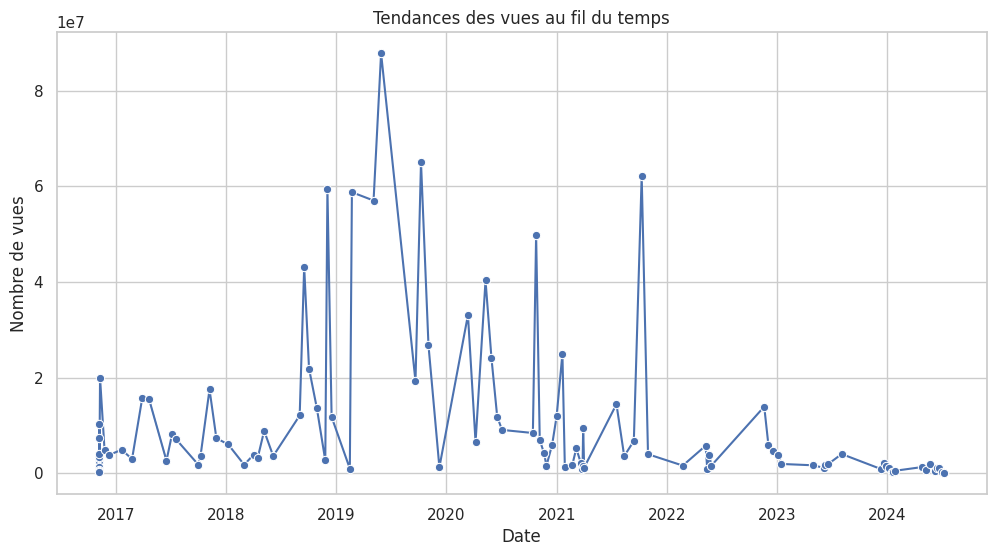

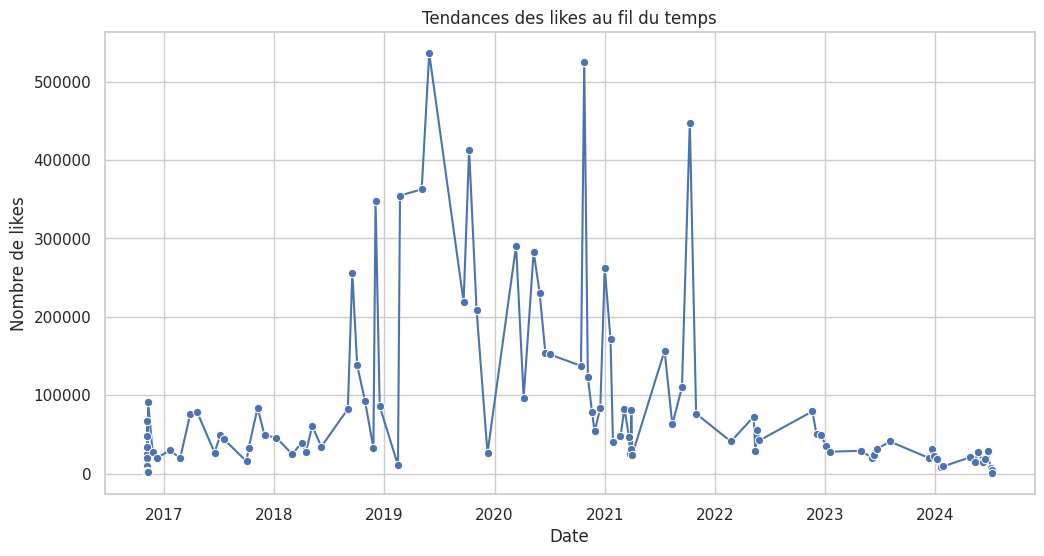

In [24]:
# Vues au fil du temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Song Date', y='Number of Views', marker='o')
plt.title('Tendances des vues au fil du temps')
plt.xlabel('Date')
plt.ylabel('Nombre de vues')
plt.show()

# Likes au fil du temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Song Date', y='Number of Likes', marker='o')
plt.title('Tendances des likes au fil du temps')
plt.xlabel('Date')
plt.ylabel('Nombre de likes')
plt.show()


<ipython-input-25-165a051f766a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_views, y='Song Name', x='Number of Views', palette='viridis')


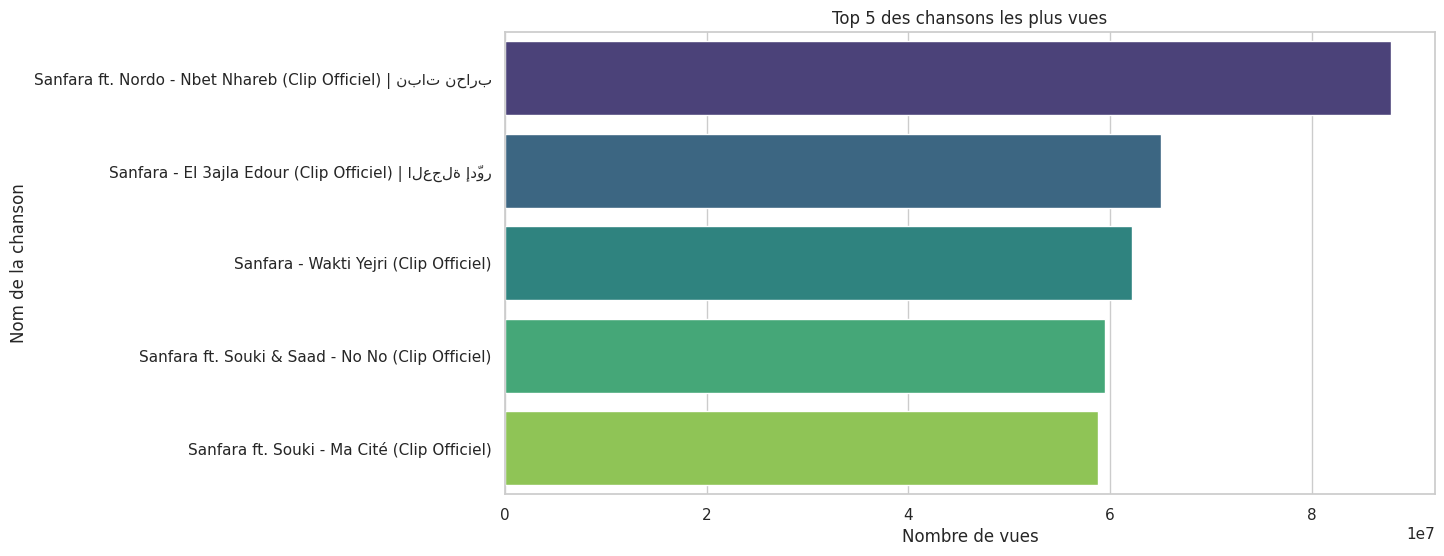

<ipython-input-25-165a051f766a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_likes, y='Song Name', x='Number of Likes', palette='viridis')


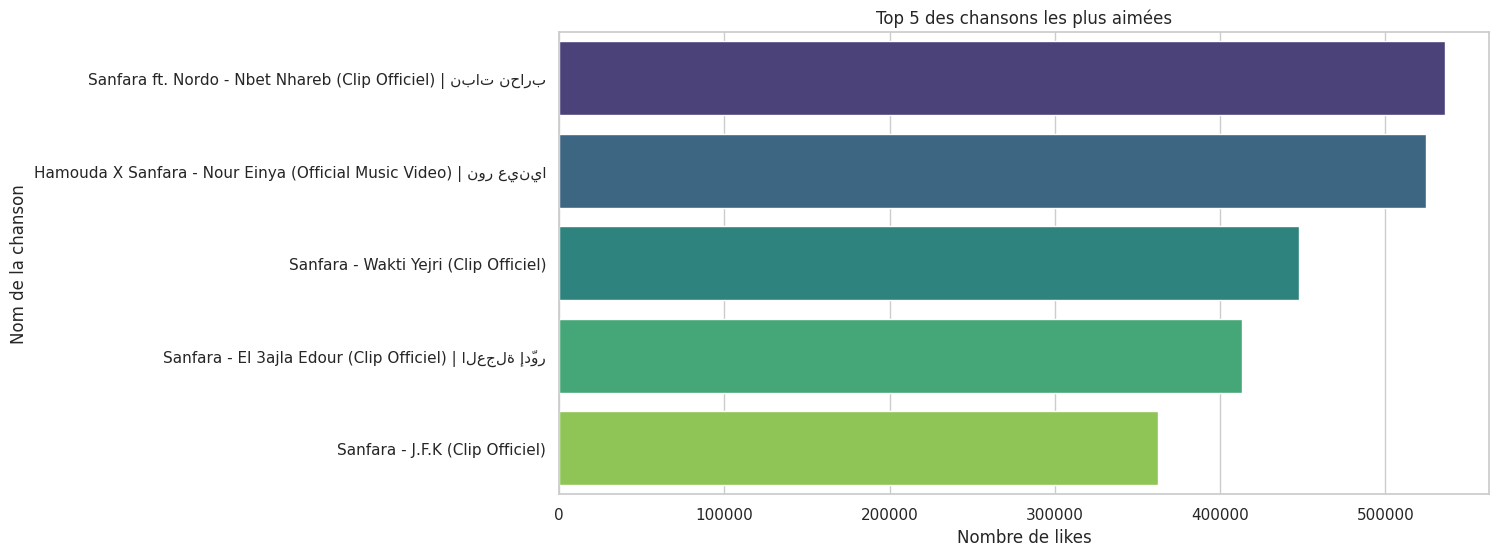

In [25]:
# Top 5 des chansons les plus vues
df_top_views = df_cleaned.nlargest(5, 'Number of Views')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_views, y='Song Name', x='Number of Views', palette='viridis')
plt.title('Top 5 des chansons les plus vues')
plt.xlabel('Nombre de vues')
plt.ylabel('Nom de la chanson')
plt.show()

# Top 5 des chansons les plus aimées
df_top_likes = df_cleaned.nlargest(5, 'Number of Likes')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_likes, y='Song Name', x='Number of Likes', palette='viridis')
plt.title('Top 5 des chansons les plus aimées')
plt.xlabel('Nombre de likes')
plt.ylabel('Nom de la chanson')
plt.show()


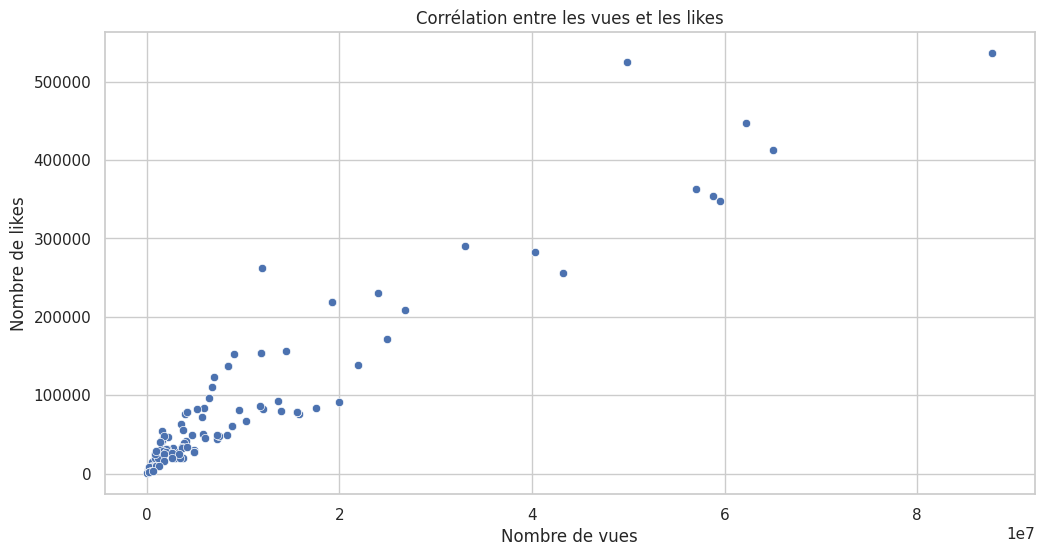

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='Number of Views', y='Number of Likes')
plt.title('Corrélation entre les vues et les likes')
plt.xlabel('Nombre de vues')
plt.ylabel('Nombre de likes')
plt.show()


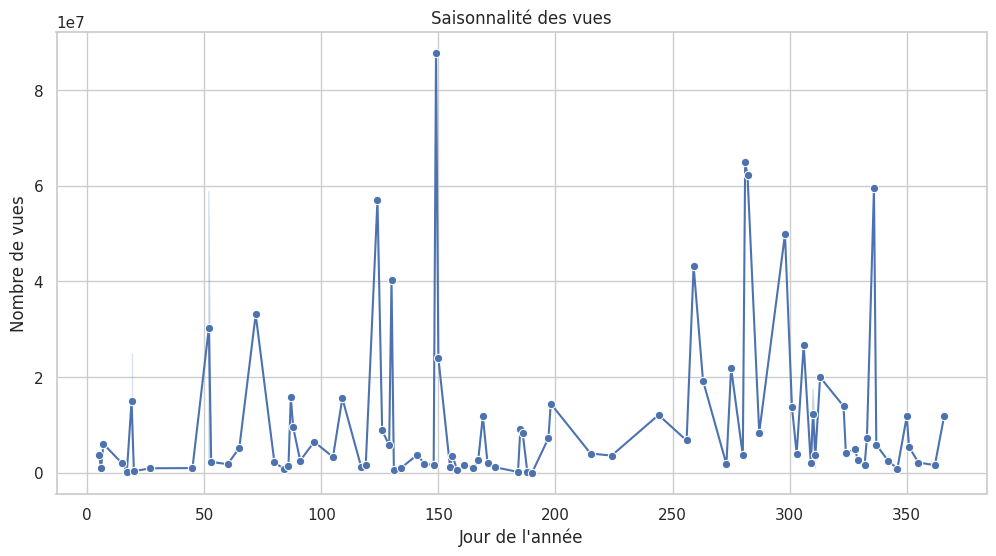

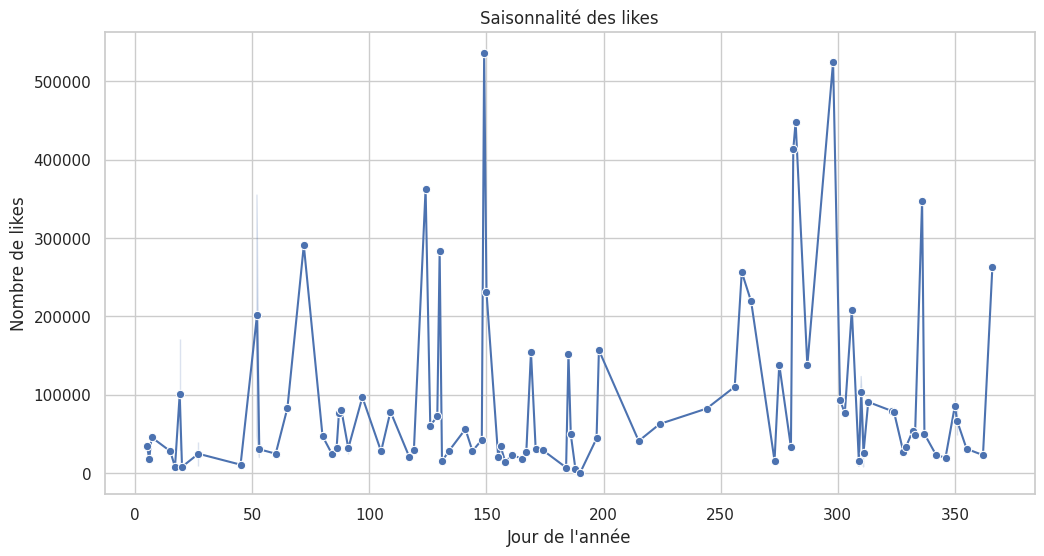

In [27]:
# Ajout des colonnes de saisonnalité
df_cleaned['DayOfYear'] = df_cleaned['Song Date'].dt.dayofyear

# Saison des vues
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='DayOfYear', y='Number of Views', marker='o')
plt.title('Saisonnalité des vues')
plt.xlabel('Jour de l\'année')
plt.ylabel('Nombre de vues')
plt.show()

# Saison des likes
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='DayOfYear', y='Number of Likes', marker='o')
plt.title('Saisonnalité des likes')
plt.xlabel('Jour de l\'année')
plt.ylabel('Nombre de likes')
plt.show()
